# Aerofit Business Case

### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wget

In [2]:
df_original = pd.read_csv('aerofit_treadmill.csv')

In [3]:
df_original.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
print(df_original.shape)

print('Number of Rows: ', df_original.shape[0])
print('Number of Columns: ', df_original.shape[1])

(180, 9)
Number of Rows:  180
Number of Columns:  9


In [5]:
df_original.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df_original.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Non-Graphical Analysis

In [8]:
df_original.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [9]:
df_original['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [10]:
df_original['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

In [11]:
df_original['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [12]:
df_original['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [13]:
df_original['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

In [14]:
df_original.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [15]:
df_original.duplicated().sum()

0

#### No Null values are present in this dataset and also no duplicate rows are present.



### Univariate Analysis

Understanding the categorical features of the data:
1. Product
2. Gender
3. MaritalStatus

Text(0.5, 1.0, 'MaritalStatus Count')

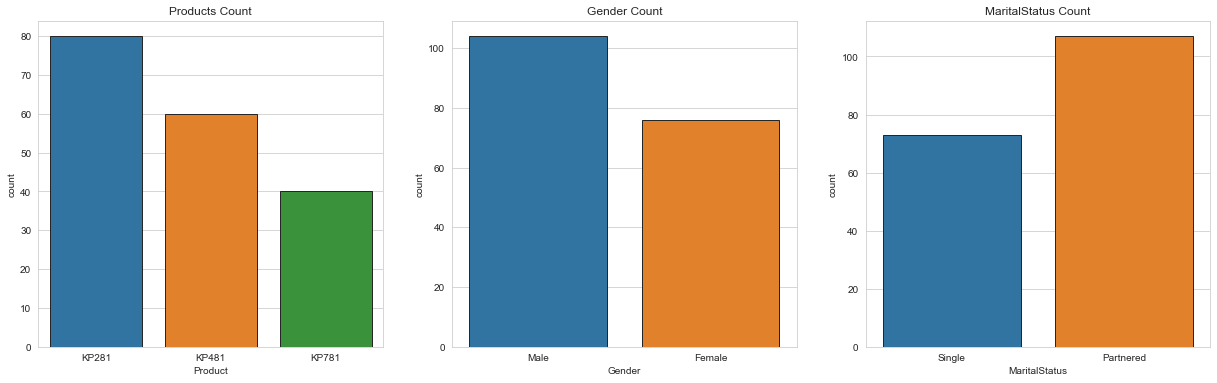

In [16]:
sns.set_style(style='whitegrid')
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(21,6))

sns.countplot(data=df_original, x='Product', ax=axis[0], edgecolor="0.15")
sns.countplot(data=df_original, x='Gender', ax=axis[1], edgecolor="0.15")
sns.countplot(data=df_original, x='MaritalStatus', ax=axis[2], edgecolor="0.15")

axis[0].set_title('Products Count')
axis[1].set_title('Gender Count')
axis[2].set_title('MaritalStatus Count')

Understanding the Continuos features of the Dataset
1. Age
2. Education
3. Usage
4. fitness
5. Income
6. Miles

<AxesSubplot:xlabel='Age', ylabel='Count'>

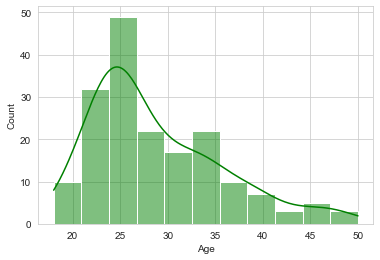

In [17]:
sns.histplot(data=df_original, x='Age', kde=True, color='g')

<AxesSubplot:xlabel='Education', ylabel='Count'>

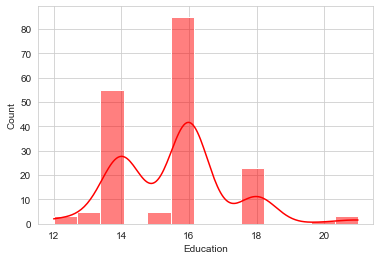

In [18]:
sns.histplot(data=df_original, x='Education', kde=True, color='r')

<AxesSubplot:xlabel='Usage', ylabel='Count'>

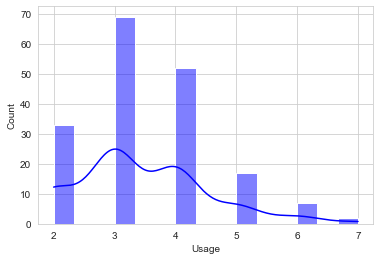

In [19]:
sns.histplot(data=df_original, x='Usage', kde=True, color='b')

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

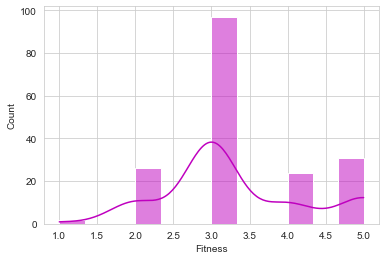

In [20]:
sns.histplot(data=df_original, x='Fitness', kde=True, color='m')

<AxesSubplot:xlabel='Income', ylabel='Count'>

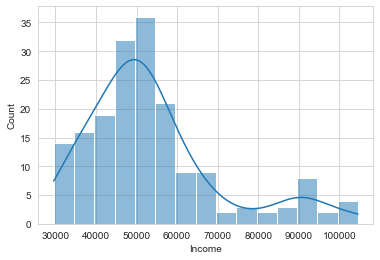

In [21]:
sns.histplot(data=df_original, x='Income', kde=True)

<AxesSubplot:xlabel='Miles', ylabel='Count'>

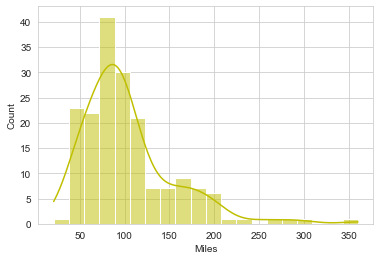

In [22]:
sns.histplot(data=df_original, x='Miles', kde=True, color='y')

#### Now detecting the outliers in eachh column using BoxPLot

Text(0.5, 1.0, 'Miles')

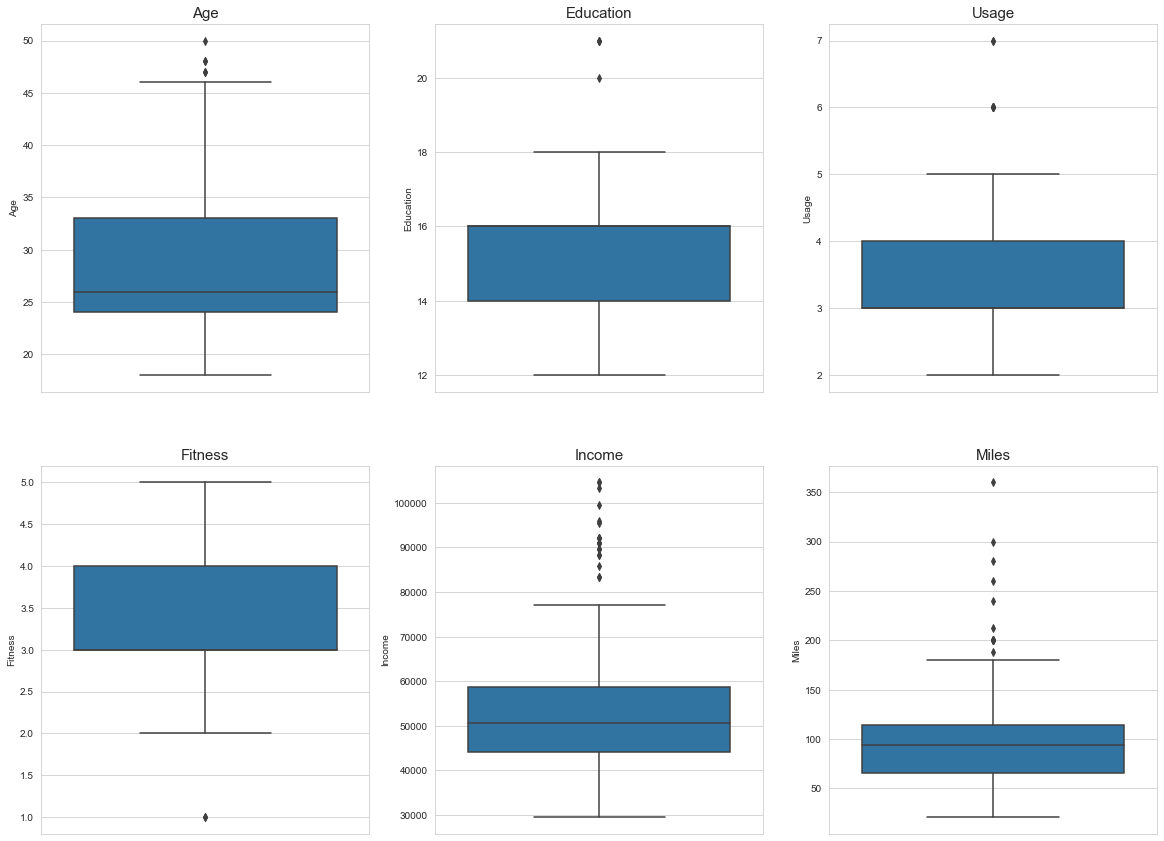

In [23]:
sns.set_style(style='whitegrid')
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20,6))
fig.subplots_adjust(top=2)

sns.boxplot(data=df_original, y='Age', ax=axis[0,0]).set_title('Age', fontsize=15)
sns.boxplot(data=df_original, y='Education', ax=axis[0,1]).set_title('Education', fontsize=15)
sns.boxplot(data=df_original, y='Usage', ax=axis[0,2]).set_title('Usage', fontsize=15)
sns.boxplot(data=df_original, y='Fitness', ax=axis[1,0]).set_title('Fitness', fontsize=15)
sns.boxplot(data=df_original, y='Income', ax=axis[1,1]).set_title('Income', fontsize=15)
sns.boxplot(data=df_original, y='Miles', ax=axis[1,2]).set_title('Miles', fontsize=15)

From the above Boxplots we can derive some observations as follows:
1. The features Age, Education, Usage and Fitness have very less outliers.
2. In Income and Miles features we can see more number of outliers.

In [24]:
round(df_original.groupby('Gender')['Gender'].count() / len(df_original) * 100, 2)

Gender
Female    42.22
Male      57.78
Name: Gender, dtype: float64

We can see that there are total of 57.78% Males and 42.22% Females.

In [25]:
round(df_original.groupby('MaritalStatus')['MaritalStatus'].count() / len(df_original) * 100, 2)

MaritalStatus
Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

We can see that out off all the customers 59.44% are Married(Partnered) and 40.46% are Unmarried(Single).

In [26]:
round(df_original.groupby('Product')['Product'].count() / len(df_original) * 100, 2)

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

### Bivariate Analysis
Check if features like marital status, age have any effect on the product purchased 

Text(0.5, 1.0, 'Product vs Gender')

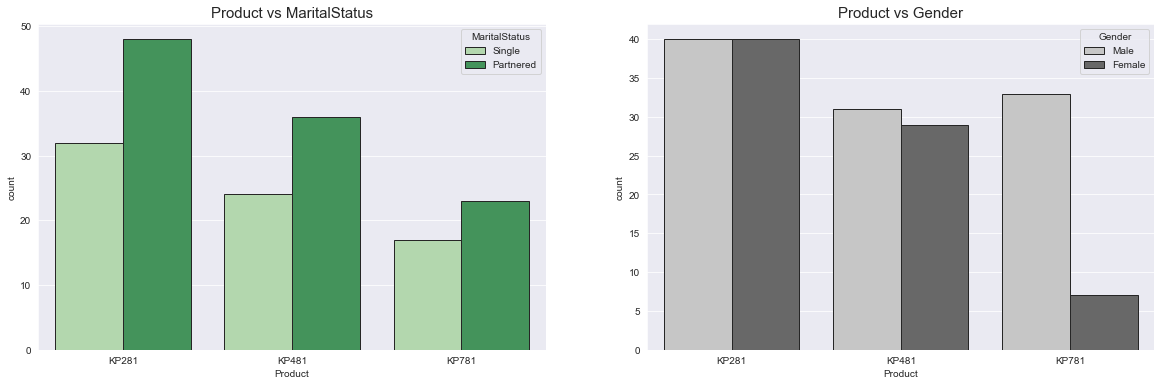

In [27]:
sns.set_style(style='darkgrid')
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.countplot(data=df_original, x='Product', hue='MaritalStatus', edgecolor="0.15", palette="Greens", ax=axis[0])
sns.countplot(data=df_original, x='Product', hue='Gender', edgecolor="0.15", palette="Greys", ax=axis[1])

axis[0].set_title('Product vs MaritalStatus', fontsize=15)
axis[1].set_title('Product vs Gender', fontsize=15)

### Product vs MaritalStatus
1. Customer who are partnered(married) have purchased more treadmills than those who are single and this is in case of all three products.
2. More number of partenered customers are preferring KP281 product.

### Product vs Gender
1. Equal number of Males and Females have purchased KP281 treadmill.
2. For KP781 product the purchasing count of Males is very much high as compared to Females.

Text(0.5, 1.0, 'Product Vs Miles')

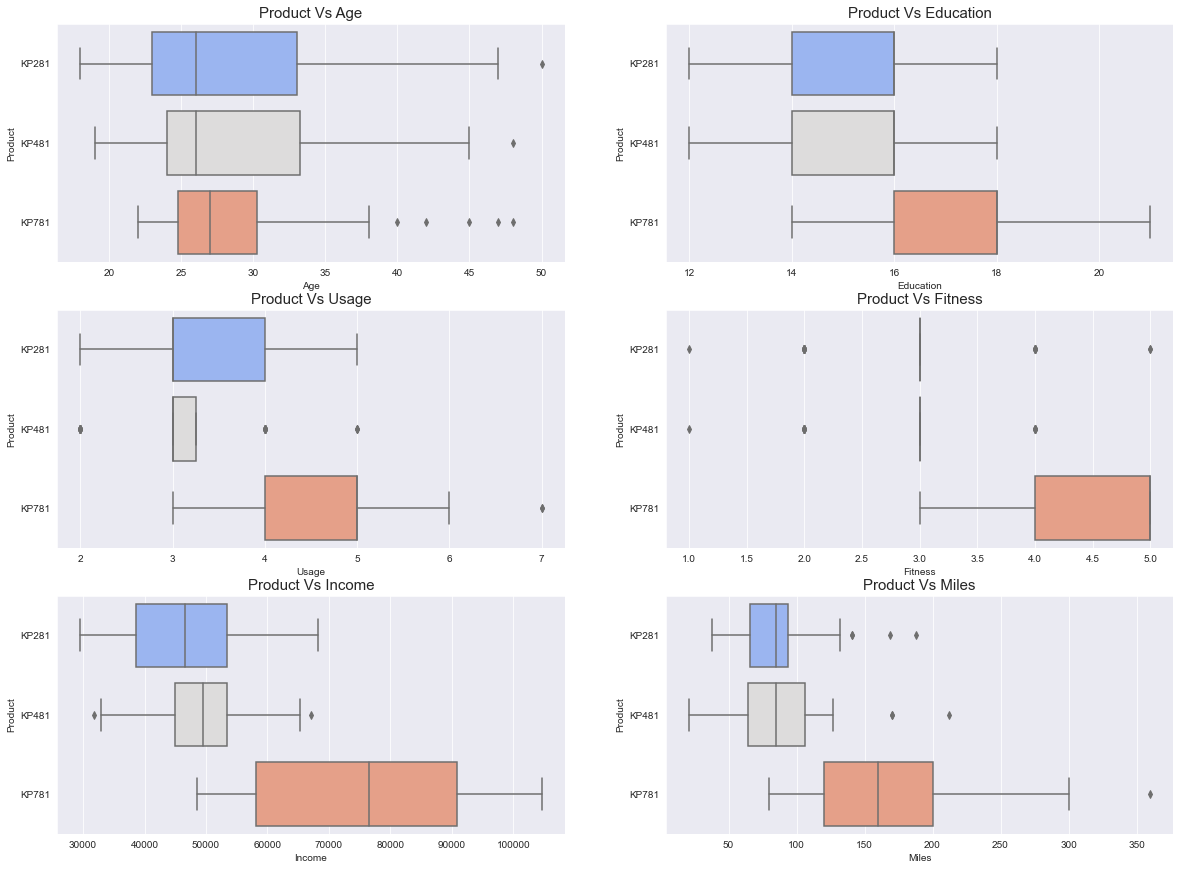

In [28]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20,6))
fig.subplots_adjust(top=2)

sns.boxplot(data=df_original, x='Age', y='Product', ax=axis[0,0], palette='coolwarm').set_title('Product Vs Age', fontsize=15)
sns.boxplot(data=df_original, x='Education', y='Product', ax=axis[0,1], palette='coolwarm').set_title('Product Vs Education', fontsize=15)
sns.boxplot(data=df_original, x='Usage', y='Product', ax=axis[1,0], palette='coolwarm').set_title('Product Vs Usage', fontsize=15)
sns.boxplot(data=df_original, x='Fitness', y='Product', ax=axis[1,1], palette='coolwarm').set_title('Product Vs Fitness', fontsize=15)
sns.boxplot(data=df_original, x='Income', y='Product', ax=axis[2,0], palette='coolwarm').set_title('Product Vs Income', fontsize=15)
sns.boxplot(data=df_original, x='Miles', y='Product', ax=axis[2,1], palette='coolwarm').set_title('Product Vs Miles', fontsize=15)

#### Below are some of the observations from above plots:
1. The median age of the customers who are purchasing KP281 and KP481 is almost same.
2. The chances of the customers who have education between 14-16 years are equal to purchase KP281 and KP481 and the customers with age higher than 16 years tend to buy KP781.
3. Customers with usage 4-5 times week prefer to buy KP781 and the rest prefer to buy KP281 and KP481.
4. Customers with fitness greater than 4 prefer only KP781.
5. Customers whose median income is very high prefer to purchase KP781 may be due to its advanced features.
6. The customers who run less tend to buy KP281 & KP481 as the median on runninig distance is almost same and also the customers who run long distance buy KP781.

### Multivariate Analysis

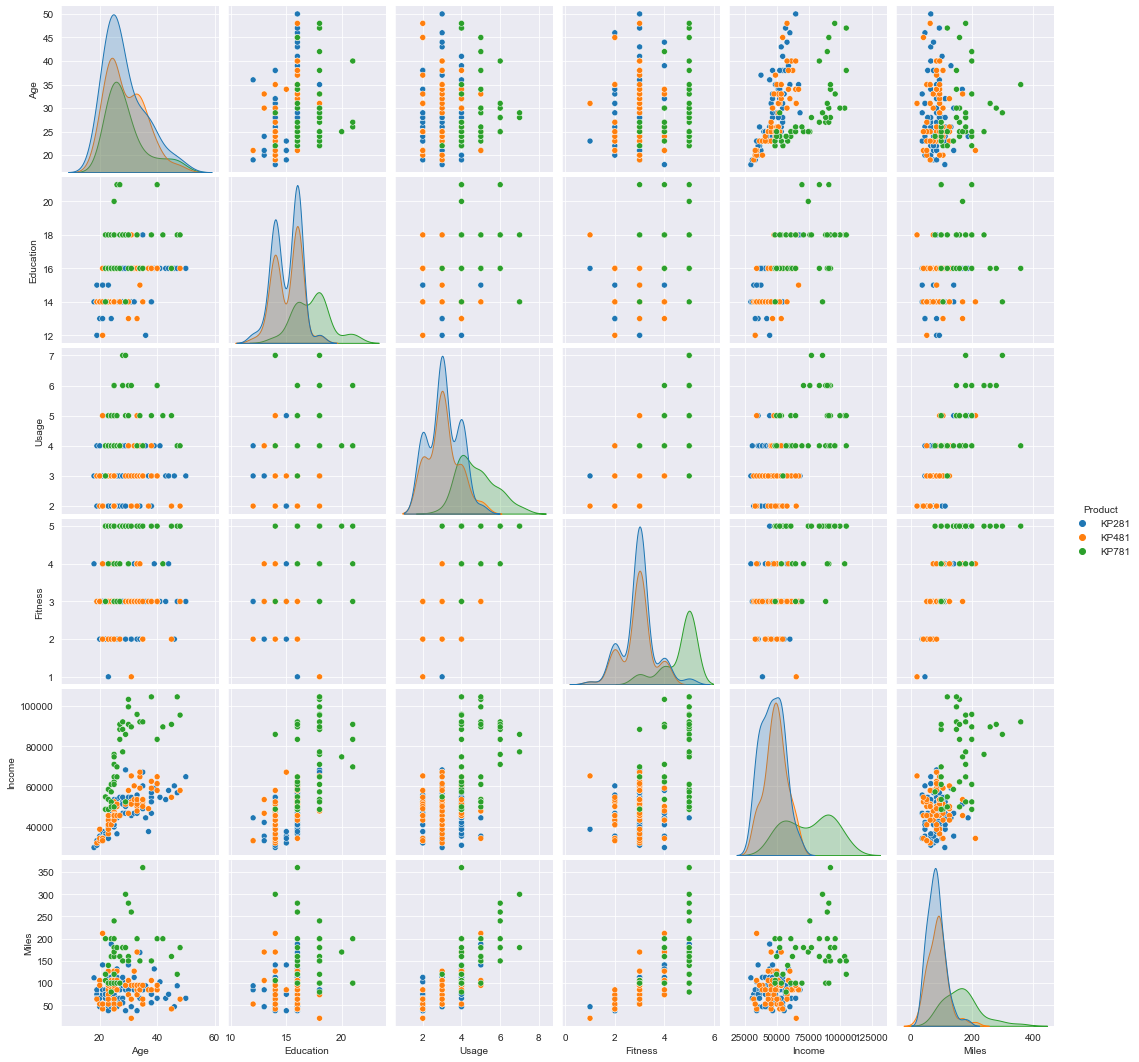

In [29]:
sns.pairplot(data=df_original, hue='Product')

<AxesSubplot:>

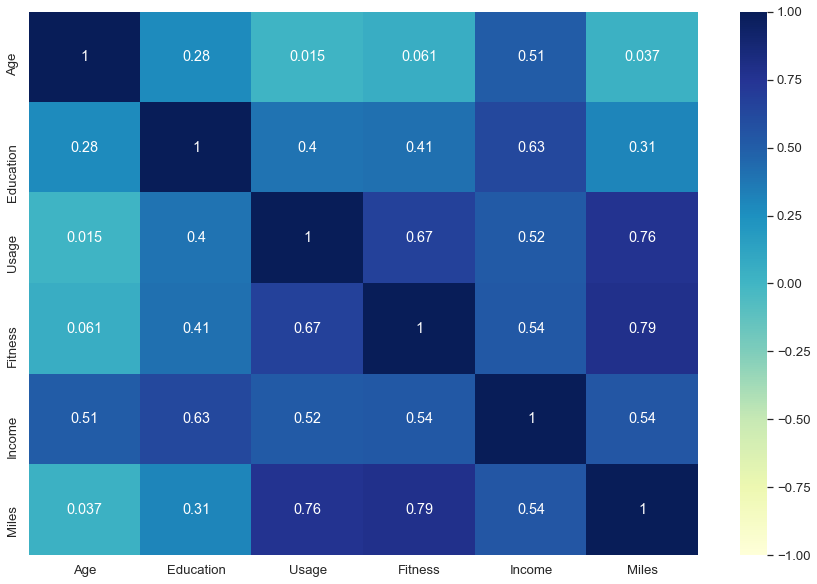

In [30]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)

df_corr = df_original.corr()
sns.heatmap(data=df_corr, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

#### Observations from above plots:
1. Miles & Fitness and Miles & Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
2. Income & Education are also highly correlated, which means that customers who are highly educated and have high income will prefer to purchase advanced models of treadmills like KP781.
3. Age & Usage or Age &  Fitness or Age & Miles do not show correlation between themselves, which means that Age should not be a crieteria to use treadmills.

In [31]:
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df_original['IncomeSlab'] = pd.cut(df_original['Income'],bins_income,labels = labels_income)

In [32]:
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
df_original['AgeCategory'] = pd.cut(df_original['Age'], bins,labels=labels)
df_original

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeSlab,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income,Teens
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income,Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income,Teens
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income,Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle income,Teens
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Upper-Middle income,30s
176,KP781,42,Male,18,Single,5,4,89641,200,High income,Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,High income,Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,High income,Above 40s


### Calculating Probabilities

#### Marginal Probability of Products

In [35]:
df_original['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

#### Product-Income

In [36]:
pd.crosstab(index=df_original['Product'], columns=[df_original['IncomeSlab']],margins=True) 

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [42]:
# Percentage of a high-income customer purchasing a treadmill (Marginal Probability)

# Sum of the treadmill purchased by high income customer by total no. of customers.
print(f'Probability of High Income customers buying treadmills: {round(14/180,2)*100} %')

Probability of High Income customers buying treadmills: 8.0 %


In [44]:
# Percentage of a High-income customer purchasing KP781 treadmill (Joint Probability)

# Sum of the treadmill with model TM798 purchased by high income customer by total no. of customers.
print(f'Probability of High Income customers buying KP781 treadmills: {round(17/180,2)*100} %')

Probability of High Income customers buying KP781 treadmills: 9.0 %


In [45]:
# Percentage of customer with high-Income salary buying treadmill given that Product is KP781 (Conditional Probability)

print(f'Probability of High Income customers buying KP781 treadmills: {round(17/17,2)*100} %')

Probability of High Income customers buying KP781 treadmills: 100.0 %


Customers having salary more than USD dollar 85,000 buys only TM798 (high-end Model).

#### Product-Gender

In [47]:
pd.crosstab(index=df_original['Product'], columns=[df_original['Gender']],margins=True) 

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [49]:
# Percentage of a Male customer purchasing a treadmill

prob = round((104/180),2)
pct = round(prob*100,2)
print(f'Probability of Male customers purchasing treadmills: {pct} %')

Probability of Male customers purchasing treadmills: 58.0 %


In [50]:
# Percentage of a Female customer purchasing KP781 treadmill

prob = round((7/180),2)
pct = round(prob*100,2)
print(f'Probability of Female customers purchasing KP781 treadmill: {pct} %')

Probability of Female customers purchasing KP781 treadmill: 4.0 %


In [51]:
# Percentage of Female customer buying treadmill given that Product is KP281
# P(Female|KP281(Female,KP281) / p(KP281)

prob = round((40/80),2)
pct = round(prob*100,2)
print(f'Probability of Female customers purchasing KP281 treadmill: {pct} %')

Probability of Female customers purchasing KP281 treadmill: 50.0 %


1. Female customer prefer to buy KP281 & KP481
2. 50% of female tend to purchase treadmill model KP281

#### Product - AgeCategory

In [52]:
pd.crosstab(index=df_original['Product'], columns=[df_original['AgeCategory']],margins=True) 

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [53]:
# Percentage of customers with Age between 20s and 30s use treadmills

prob = round((110/180),2)
pct = round(prob*100,2)
print(f'Probability of customers with age between 20s and 30s: {pct} %')

Probability of customers with age between 20s and 30s: 61.0 %


1. Teen doesnot prefer to buy KP781
2. 61% of customer with Age group between 20 and 30 purchase treadmills.

#### Product - Fitness

In [54]:
pd.crosstab(index=df_original['Product'], columns=[df_original['Fitness']],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [55]:
# Percentage of a customers having fitness level5 are

prob = round((31/180),2)
pct = round(prob*100,2)
print(f'Probability of customers having fitness level 5: {pct} %')

Probability of customers having fitness level 5: 17.0 %


In [56]:
# Percentage of a customer with Fitness Level 5 purchasing TM798 treadmill

prob = round((29/180),2)
pct = round(prob*100,2)
print(f'Probability of customers having fitness level 5 purchasing KP781: {pct} %')

Probability of customers having fitness level 5 purchasing KP781: 16.0 %


In [57]:
# Percentage of customer with fitness level-5 buying KP781 treadmill given that Product is KP781

prob = round((29/31),2)
pct = round(prob*100,2)
print(f'Probability of customers having fitness level 5 purchasing KP781 given product is KP781: {pct} %')

Probability of customers having fitness level 5 purchasing KP781 given product is KP781: 94.0 %


### Insights

1. Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model TM195.
2. The majority of treadmill customers fall within the USD 45,000 - USD 80,000 income bracket. 83% of treadmills are bought by individuals with incomes between USD dollor 35000 and 85000.
3. There are only 8% of customers with incomes below USD 35000 who buy treadmills.
4. 88% of treadmills are purchased by customers aged 20 to 40.
5. Miles and Fitness & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
6. KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over USD dollor 85,000.
7. With Fitness level 4 and 5, the customers tend to use high-end models and the average number of miles is above 150 per week

### Recommendations
1. KP281 & KP481 are popular with customers earning USD 45,000 and USD 60,000 and can be offered by these companies as affordable models.
2. KP781 should be marketed as a Premium Model and marketing it to high income groups and educational over 20 years market segments could result in more sales.
3. Aerofit should conduct market research to determine if it can attract customers with income under USD 35,000 to expand its customer base.
4. The KP781 is a premium model, so it is ideally suited for sporty people who have a high average weekly mileage.